In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
from datetime import datetime
from sklearn.model_selection import KFold

In [2]:
class Regression(object):  
    def __init__(self, dataframe, feature, start_date, end_date):
        
        '''
        Arguments:
            dataframe: dataframe we are trying to forecast from the web.DataReader
            dataname: This is the required name of the company deta we want to perform
                        regression
            feature: It indicates the dependent variable we would be prediction
            start_date: As implied signifies the start date of the stock we intend to predict
            end_date:   As implied signifies the end date of the stock we intend to predict
            
        '''
        
        self.dataframe = dataframe
        self.feature = feature
        self.start_date = start_date
        self.end_date = end_date
        
        #################################################################
        #### LOAD DATA
        #################################################################
        #Load data using datetime for the
        #start and end date
        #start_date = datetime(1976, 1, 1)
        #end_date = datetime(2018, 7, 16)
        try:
            if self.start_date == None and self.end_date == None:
                raise('No data to plot regression')
            else:
                self.data = web.DataReader(self.dataframe, "yahoo", self.start_date, self.end_date)
        except ValueError:
            raise('Insuffient data or error fetching data')
        finally:
            pass
        
    #################################################################
    #### REGRESSION MODULE
    #################################################################
    def regress(self):
        #define the feature vector we would be using for 
        #to plot our regression
        df = self.data[[self.feature]]
        
        #Its a dataframe so we have to convert
        #it into a numerical data
        #We also dont need this since the data is already in float
        #df.info() to check datatype
        #df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
        
        df['Volatility'] = df[self.feature] - df[self.feature].shift(1).fillna(0)
        
        #linear regression model
        from sklearn.linear_model import LinearRegression
        
        #this we would be using to draw our regression line
        Xf1 = np.arange(1, len(df)+ 1)
        Xf2 = (Xf1**2).astype(np.float64)
        Xf3 = (Xf1**3).astype(np.float64)
        #Xf4 = (Xf1**4).astype(np.float64)
        
        #put our numpy array in a list
        Xf = [Xf1, Xf2, Xf3]#, Xf4]
        #transpose and reshape our data into (Nx4)Dimensions
        Xf = np.reshape(Xf, (3, len(df))).T
        Yf = df[self.feature]
        
        ##KFold cross validation
        k_fold = KFold(n_splits = 3, random_state=None, shuffle=False)
        for train, test in k_fold.split(Xf):
            X_train, X_test = Xf[train], Xf[test]
            Y_train, Y_test = Yf[train], Yf[test]
            #create a regression class
            regress = LinearRegression(n_jobs = -1)
            #fit regression line
            #regress.fit(X_train, Y_train)
            regress.fit(Xf, Yf)
        print('Test Score:{}'.format(regress.score(X_test, Y_test)))
        print(zip(Xf, regress.coef_))
        #get the coefficients and intercept
        coeffs = regress.coef_
        intercept = regress.intercept_
        
        #create a Regression and residual column
        #in out dataframe
        df['Regression'] = intercept + coeffs[0] * Xf1 + coeffs[1] * Xf2 + coeffs[2] * Xf3# + coeffs[3] * Xf4 
        df['Residuals'] = df[self.feature] - df['Regression']
        df['Upper regresss bound'] = df['Regression'] + df['Regression'].std()
        df['Lower regresss bound'] = df['Regression'] - df['Regression'].std()
        
        #plot 2D chart of result
        df[[self.feature, 'Regression', 'Upper regresss bound', 'Lower regresss bound',]].plot(LW = 1., title = 'Polynomial Regression line for {}'.format(self.dataframe))
        plt.legend(loc = 'best')
        plt.grid(True)
        plt.show()

/Users/ceceptriyandi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ceceptriyandi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ceceptriyandi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

Test Score:0.6165580395512003


/Users/ceceptriyandi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


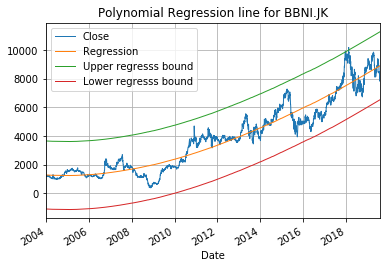

In [3]:
if __name__ == '__main__':
    #create an object of the regression class | Unit testing
    dataframe = ['BBNI.JK']
    for data in dataframe:
        c = Regression(data, 'Close', datetime(2003, 1, 1), datetime.now())
        #call the attribute of the Regression class
        c.regress()